## Reading Data and check values

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fraud.csv")
print(df.head(3))

   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  


#### Checking missing values/ nulls

In [41]:
print("\nMissing values per column:")
print(df.isnull().sum())

print(df.dtypes)


Missing values per column:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64
step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


In [42]:
print(df.describe())

                step         amount          fraud
count  594643.000000  594643.000000  594643.000000
mean       94.986827      37.890135       0.012108
std        51.053632     111.402831       0.109369
min         0.000000       0.000000       0.000000
25%        52.000000      13.740000       0.000000
50%        97.000000      26.900000       0.000000
75%       139.000000      42.540000       0.000000
max       179.000000    8329.960000       1.000000


### Extacting Days & Hours from Step 

In [43]:
# Step = hours since start
df['day'] = df['step'] // 24
df['hour'] = df['step'] % 24


In [44]:
df[df["step"] == 164]
# 164 hours = Day 6 & Hour 20

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,day,hour
535095,164,'C537423962','3','F','28007','M1823072687','28007','es_transportation',20.99,0,6,20
535096,164,'C1617276678','3','M','28007','M1823072687','28007','es_transportation',7.31,0,6,20
535097,164,'C2060778761','5','F','28007','M348934600','28007','es_transportation',39.10,0,6,20
535098,164,'C1166683343','2','F','28007','M1823072687','28007','es_transportation',5.35,0,6,20
535099,164,'C655150548','1','F','28007','M1823072687','28007','es_transportation',42.63,0,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...
538770,164,'C915739806','4','M','28007','M348934600','28007','es_transportation',34.93,0,6,20
538771,164,'C1421006824','2','F','28007','M85975013','28007','es_food',44.40,0,6,20
538772,164,'C299357678','3','F','28007','M1823072687','28007','es_transportation',9.64,0,6,20
538773,164,'C790593937','3','F','28007','M348934600','28007','es_transportation',16.63,0,6,20


## Hours Bining 
<h4> Time of day </h4>

In [45]:
def get_time_of_day(hour):
    if 0 <= hour < 3:
        return "Midnight"
    elif 3 <= hour < 6:
        return "Early Morning"
    elif 6 <= hour < 9:
        return "Morning"
    elif 9 <= hour < 12:
        return "Late Morning"
    elif 12 <= hour < 15:
        return "Afternoon"
    elif 15 <= hour < 18:
        return "Late Afternoon"
    elif 18 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['time_of_day'] = df['hour'].apply(get_time_of_day)


In [46]:
df[df["step"] == 156]

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,day,hour,time_of_day
505550,156,'C226946948','3','M','28007','M348934600','28007','es_transportation',44.80,0,6,12,Afternoon
505551,156,'C603081336','3','F','28007','M1823072687','28007','es_transportation',20.39,0,6,12,Afternoon
505552,156,'C732095806','3','M','28007','M1823072687','28007','es_transportation',19.55,0,6,12,Afternoon
505553,156,'C137688853','4','M','28007','M85975013','28007','es_food',49.37,0,6,12,Afternoon
505554,156,'C1029994689','3','M','28007','M1823072687','28007','es_transportation',4.85,0,6,12,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509258,156,'C1780201239','1','M','28007','M151143676','28007','es_barsandrestaurants',84.67,0,6,12,Afternoon
509259,156,'C1259046770','4','F','28007','M1823072687','28007','es_transportation',6.55,0,6,12,Afternoon
509260,156,'C1541224095','2','F','28007','M348934600','28007','es_transportation',29.83,0,6,12,Afternoon
509261,156,'C1981764666','4','F','28007','M1823072687','28007','es_transportation',39.36,0,6,12,Afternoon


In [47]:
# Fraud Amount Summation per Day
amount_per_day = (
    df[df['fraud'] == 1]
    .groupby('day')['amount']
    .sum()
    .reset_index()
    .sort_values('day')
)


print(amount_per_day)

   day     amount
0    0  526213.93
1    1  538392.77
2    2  529614.63
3    3  480889.35
4    4  502629.50
5    5  509624.20
6    6  515056.27
7    7  220250.52


In [48]:
# Overall Amount Summation
total_amount = df[df['fraud'] == 1]['amount'].sum()
print(total_amount)

3822671.1700000004


<h1> Exploratory Data Analysis (EDA) </h1>

In [49]:
fraud_counts = df['fraud'].value_counts()
print(fraud_counts)

fraud
0    587443
1      7200
Name: count, dtype: int64


### Fraud (TARGET)
Pie Chart

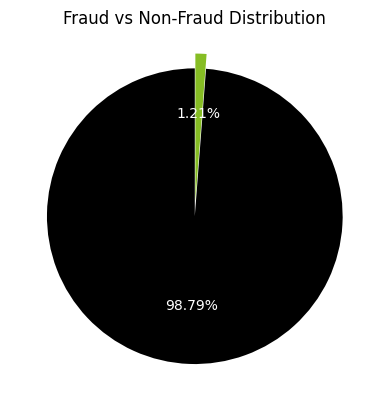

In [50]:
fraud_counts.plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=90,
    colors=['black', '#86bd24'],
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    explode=(0, 0.1)  
)
# Change all labels to white
plt.gca().set_ylabel("")  
for text in plt.gca().texts:
    text.set_color("white")
plt.title("Fraud vs Non-Fraud Distribution")
plt.ylabel("")  
plt.savefig("Target Distribution.png", dpi=300, bbox_inches="tight")

plt.show()


### Transaction Amounts: Fraud vs Non-Fraud
Box plot

C:\Users\boj11069\AppData\Local\Temp\4\ipykernel_8636\3873173002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="fraud", y="amount", data=df, palette=palette)


Fraud=0
  Min    = 0.00
  Q1     = 13.59
  Median = 26.61
  Q3     = 41.89
  Max    = 2144.86
  IQR    = 28.30
------------------------------
Fraud=1
  Min    = 0.03
  Q1     = 159.98
  Median = 319.18
  Q3     = 548.98
  Max    = 8329.96
  IQR    = 389.00
------------------------------


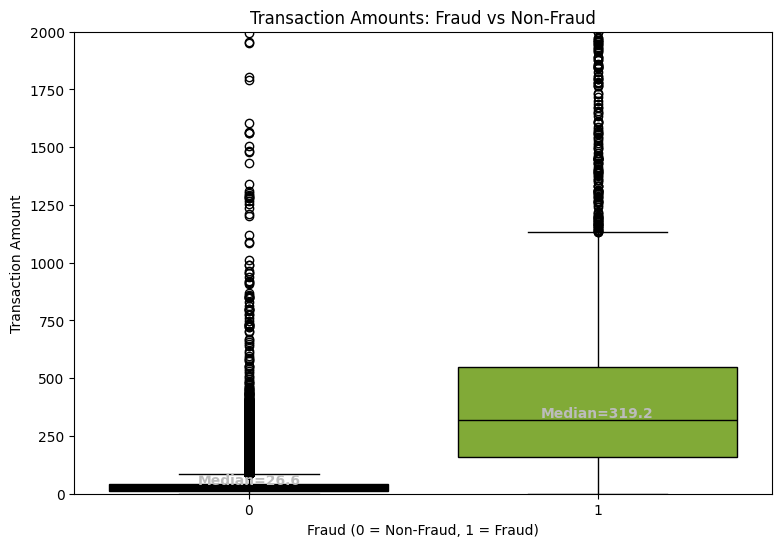

In [51]:
df["fraud"] = df["fraud"].astype(int)

palette = {"0": "black", "1": "#86bd24"}

plt.figure(figsize=(9,6))
sns.boxplot(x="fraud", y="amount", data=df, palette=palette)

plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.ylim(0, 2000)

groups = df.groupby("fraud")["amount"]

for i, (grp, values) in enumerate(groups):
    q1 = np.percentile(values, 25)
    median = np.median(values)
    q3 = np.percentile(values, 75)
    min_val = values.min()
    max_val = values.max()
    iqr = q3 - q1

    # Showing only Median label 
    plt.text(i, median, f"Median={median:.1f}",
             ha='center', va='bottom',
             color="#bcbcbc", fontsize=10, fontweight='bold')

    # Printing full details 
    print(f"Fraud={grp}")
    print(f"  Min    = {min_val:.2f}")
    print(f"  Q1     = {q1:.2f}")
    print(f"  Median = {median:.2f}")
    print(f"  Q3     = {q3:.2f}")
    print(f"  Max    = {max_val:.2f}")
    print(f"  IQR    = {iqr:.2f}")
    print("-"*30)

plt.savefig("amount_boxplot_median.png", dpi=300, bbox_inches="tight")
plt.show()


### Age Distribution: Fraud vs Non-Fraud
Bar chart

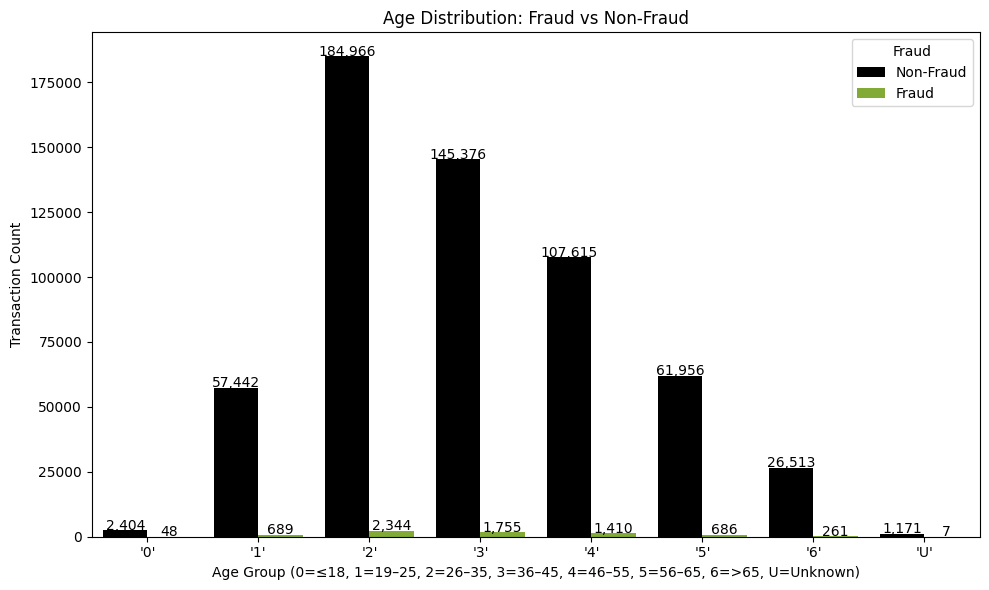

In [52]:
# Defining order per age group
age_order = ["'0'", "'1'", "'2'", "'3'", "'4'", "'5'", "'6'", "'U'"]

plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df,
    x="age",
    hue="fraud",
    order=age_order,
    palette={0: "black", 1: "#86bd24"}   
)

plt.title("Age Distribution: Fraud vs Non-Fraud")
plt.xlabel("Age Group (0=≤18, 1=19–25, 2=26–35, 3=36–45, 4=46–55, 5=56–65, 6=>65, U=Unknown)")
plt.ylabel("Transaction Count")
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])

# Adding Labels
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # to avoid prining zeros
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 200,
            f"{height:,}",  
            ha="center"
        )

plt.tight_layout()
plt.savefig("age_distribution_labeled.png", dpi=300)
plt.show()


### Gender Distribution: Fraud vs Non-Fraud
Bar chart

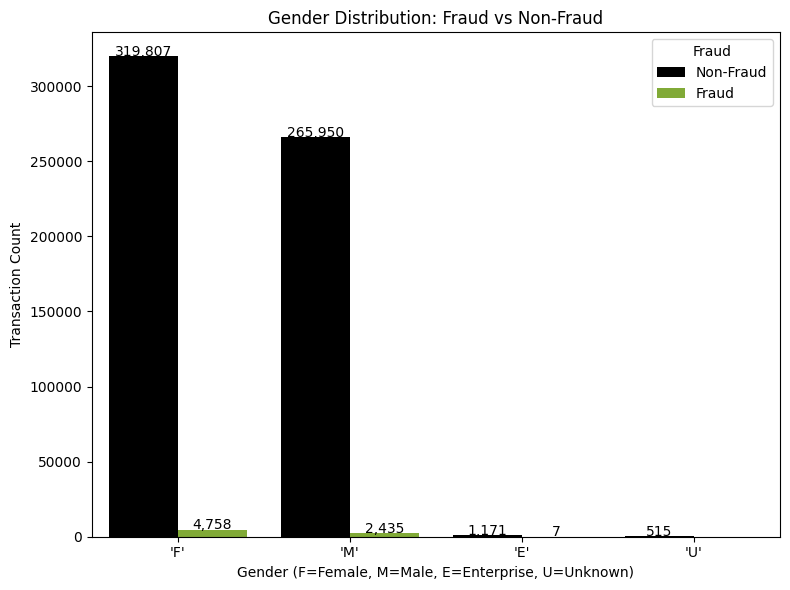

In [53]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=df,
    x="gender",     
    hue="fraud",
    order=["'F'", "'M'", "'E'", "'U'"],   
    palette={0: "black", 1: "#86bd24"}
)

plt.title("Gender Distribution: Fraud vs Non-Fraud")
plt.xlabel("Gender (F=Female, M=Male, E=Enterprise, U=Unknown)")
plt.ylabel("Transaction Count")
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])

# Adding labels
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 200,    
            f"{height:,}",   
            ha="center"
        )

plt.tight_layout()
plt.savefig("gender_distribution.png", dpi=300)
plt.show()


### Studying Categories & Merchants
To check merchant per category 

In [54]:
selected_categories = ["'es_transportation'", "'es_health'", "'es_food'"]

for cat in selected_categories:
    merchants = df.loc[df["category"] == cat, "merchant"].unique()
    print(f"\nCategory: {cat}")
    print(len(merchants))
    print( merchants)



Category: 'es_transportation'
2
["'M348934600'" "'M1823072687'"]

Category: 'es_health'
5
["'M50039827'" "'M1053599405'" "'M480139044'" "'M692898500'"
 "'M1913465890'"]

Category: 'es_food'
1
["'M85975013'"]


In [55]:
# of unique merchants is 50
df['merchant'].nunique()


50

In [56]:
# of unique category is 15
df['category'].nunique()

15

In [57]:
#checking merchants if they appear in more than one category
#Grouping merchants by category
merchant_categories = df.groupby("merchant")["category"].nunique()

multi_cat_merchants = merchant_categories[merchant_categories > 1]

print(f"Total merchants with multiple categories: {len(multi_cat_merchants)}")


Total merchants with multiple categories: 0


In [58]:
# Counting target per category
category_fraud_counts = df.groupby(["category", "fraud"]).size().unstack(fill_value=0)

print("Fraud/Non-Fraud counts per category:")
print(category_fraud_counts)


Fraud/Non-Fraud counts per category:
fraud                         0     1
category                             
'es_barsandrestaurants'    6253   120
'es_contents'               885     0
'es_fashion'               6338   116
'es_food'                 26254     0
'es_health'               14437  1696
'es_home'                  1684   302
'es_hotelservices'         1196   548
'es_hyper'                 5818   280
'es_leisure'                 25   474
'es_otherservices'          684   228
'es_sportsandtoys'         2020  1982
'es_tech'                  2212   158
'es_transportation'      505119     0
'es_travel'                 150   578
'es_wellnessandbeauty'    14368   718


In [59]:
# Fraud/Non-Fraud counts per Merchant within each Category
merchant_cat_counts = df.groupby(["category", "merchant", "fraud"]).size().unstack(fill_value=0)

print("Fraud/Non-Fraud counts per Merchant within each Category:")
print(merchant_cat_counts.head(50))  

Fraud/Non-Fraud counts per Merchant within each Category:
fraud                                       0     1
category                merchant                   
'es_barsandrestaurants' 'M151143676'     6253   120
'es_contents'           'M1313686961'     527     0
                        'M677738360'      358     0
'es_fashion'            'M1600850729'    2624     0
                        'M349281107'     2881     0
                        'M547558035'      833   116
'es_food'               'M85975013'     26254     0
'es_health'             'M1053599405'    6821     0
                        'M1913465890'    3988     0
                        'M480139044'     1874  1634
                        'M50039827'       870    46
                        'M692898500'      884    16
'es_home'               'M117188757'       21     0
                        'M1400236507'     776     0
                        'M1872033263'     525     0
                        'M2122776122'     141   200
      

### Category Distribution: Fraud vs Non-Fraud
Bar Chart

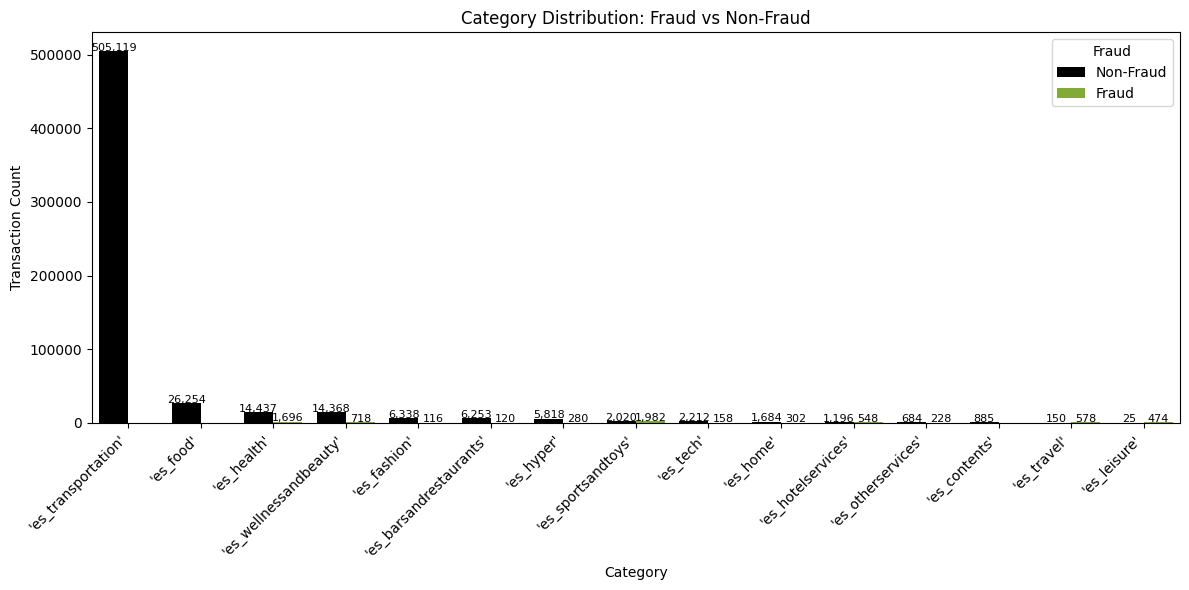

In [60]:
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=df,
    x="category",
    hue="fraud",
    order=df["category"].value_counts().index,  
    palette={0: "black", 1: "#86bd24"}
)

plt.title("Category Distribution: Fraud vs Non-Fraud")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])

# Labels
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 500,
            f"{height:,}",
            ha="center", fontsize=8
        )

plt.tight_layout()
plt.savefig("category_distribution.png", dpi=300)
plt.show()


### Category (Transaction Amount) Distribution: Fraud vs Non-Fraud
Bar Chart

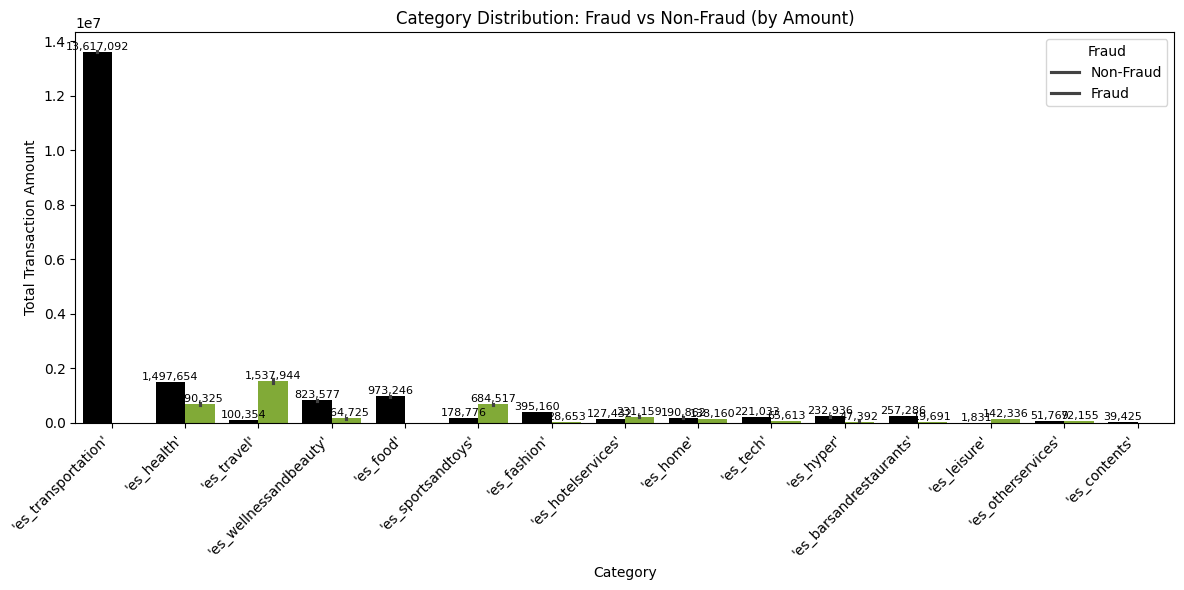

In [61]:
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df,
    x="category",
    y="amount",
    hue="fraud",
    order=df.groupby("category")["amount"].sum().sort_values(ascending=False).index,
    estimator=sum,
    palette={0: "black", 1: "#86bd24"}
)

plt.title("Category Distribution: Fraud vs Non-Fraud (by Amount)")
plt.xlabel("Category")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])

# Add value labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height,
            f"{height:,.0f}",   # format with commas, no decimals
            ha="center", va="bottom", fontsize=8
        )

plt.tight_layout()
plt.savefig("category_amount_distribution.png", dpi=300)
plt.show()


### Fraud Count per Day (Feature from Step)
Line Chart

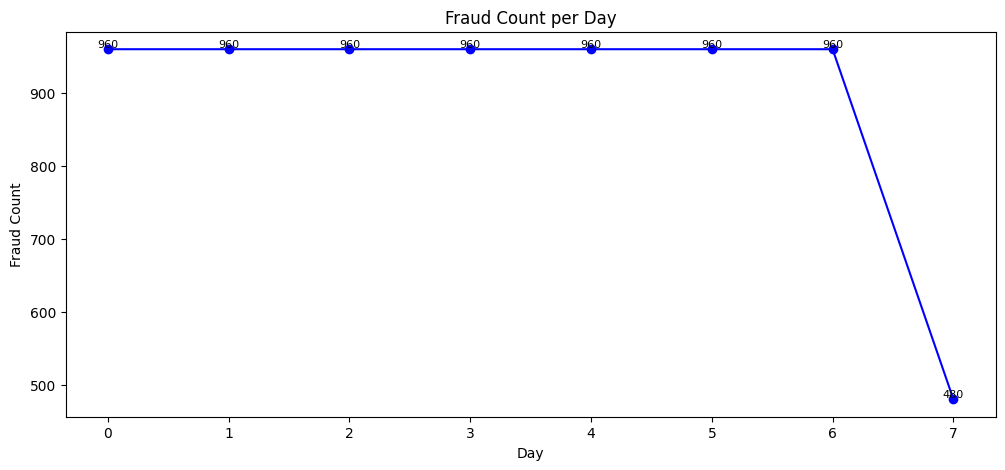

In [62]:
fraud_per_day = df.groupby("day")['fraud'].sum()

ax = fraud_per_day.plot(kind="line", marker="o", figsize=(12,5), color="blue",
                        title="Fraud Count per Day")
plt.xlabel("Day")
plt.ylabel("Fraud Count")

# Adding Labels
for x, y in fraud_per_day.items():
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=8)
plt.savefig("Day_distribution.png", dpi=300)

plt.show()


### Fraud Count per Hour (Feature from Step)
Line Chart

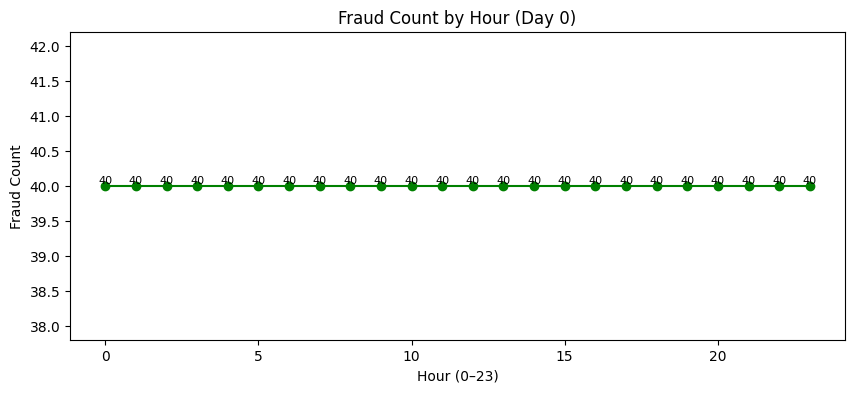

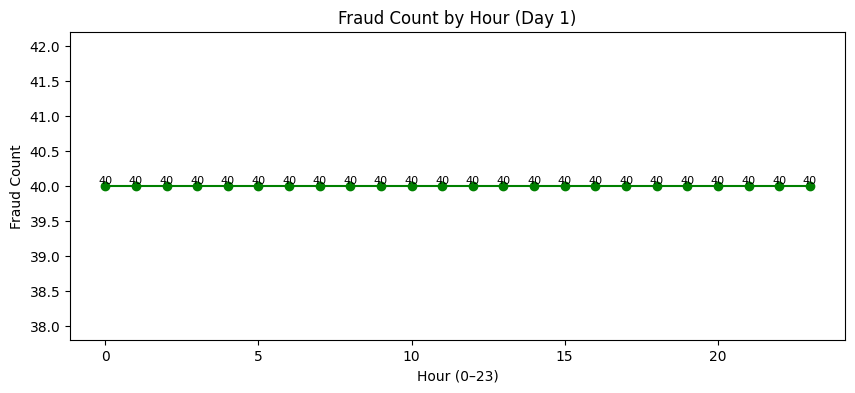

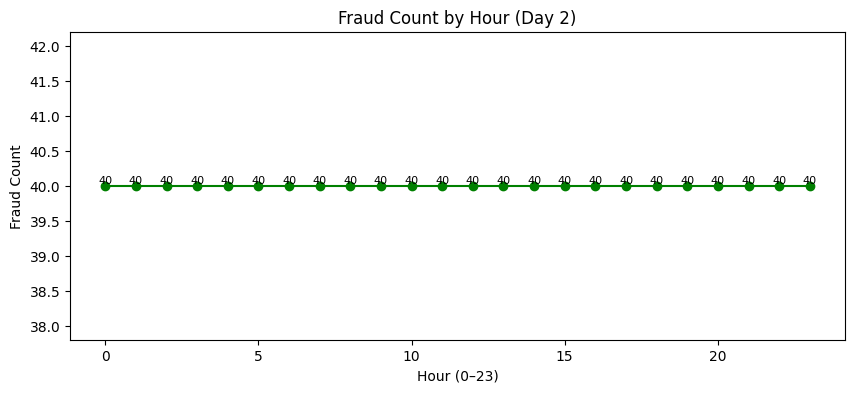

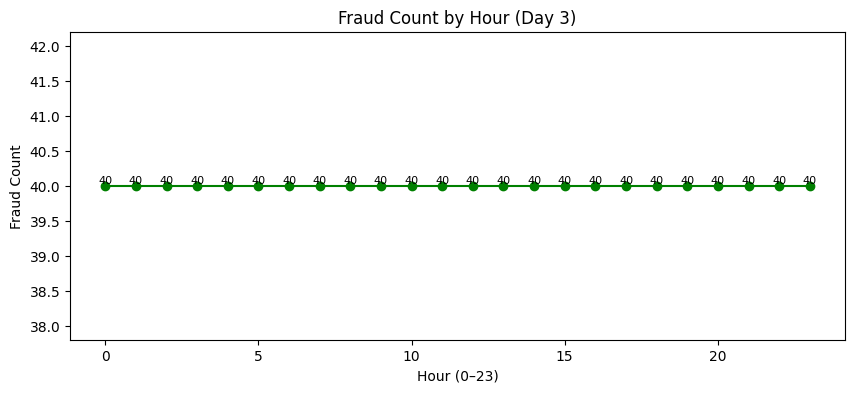

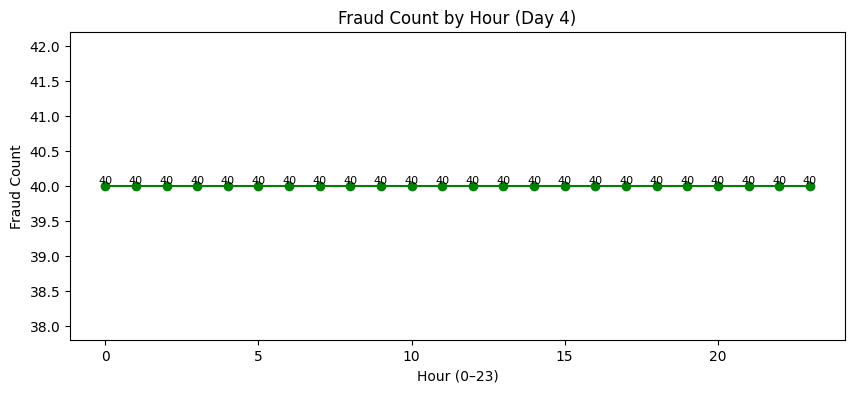

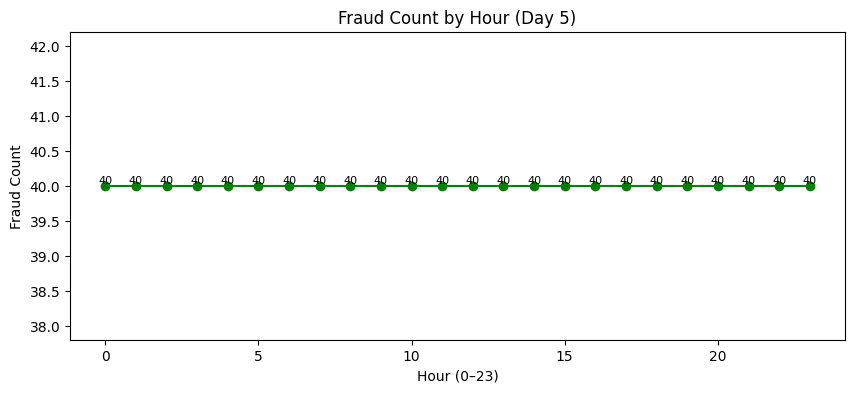

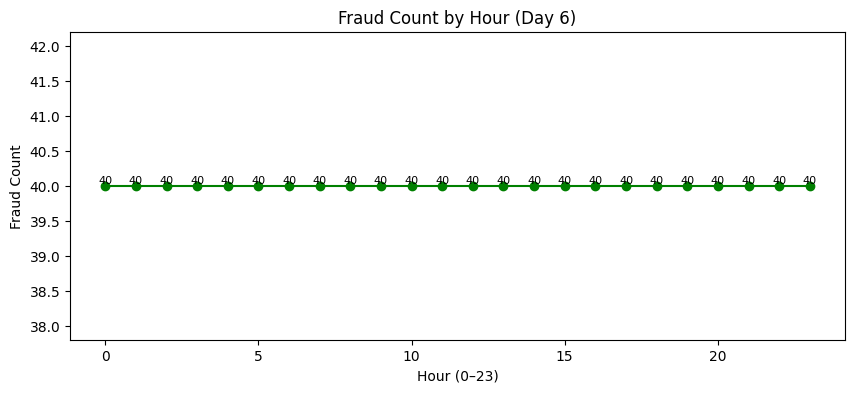

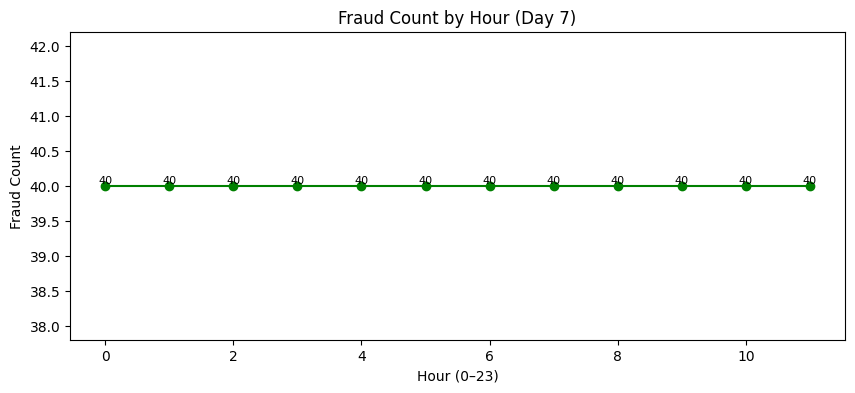

In [63]:
days = df['day'].unique()
days.sort()

for d in days:
    fraud_day_hour = df[df['day'] == d].groupby('hour')['fraud'].sum()

    ax = fraud_day_hour.plot(kind="line", marker="o", figsize=(10,4), color="green",
                             title=f"Fraud Count by Hour (Day {d})")
    plt.xlabel("Hour (0–23)")
    plt.ylabel("Fraud Count")

    # Addings Labels
    for x, y in fraud_day_hour.items():
        ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=8)

    plt.show()



### Fraud Count per Hour (All Days Combined)
Line Chart

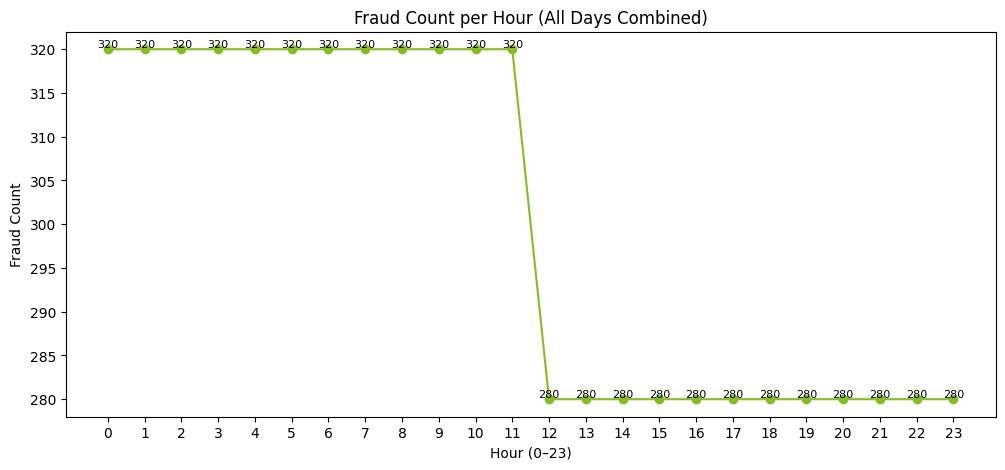

In [64]:
fraud_per_hour = df.groupby("hour")['fraud'].sum().sort_index()

ax = fraud_per_hour.plot(kind="line", marker="o", figsize=(12,5), color="#86bd24",
                         title="Fraud Count per Hour (All Days Combined)")
plt.xlabel("Hour (0–23)")
plt.ylabel("Fraud Count")

# Force x-axis ticks from 0 to 23
plt.xticks(range(24))

for x, y in fraud_per_hour.items():
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=8)
plt.savefig("Hour_distribution.png", dpi=300)

plt.show()


In [65]:
fraud_count = df.groupby("time_of_day")['fraud'].sum().sort_values()
print(fraud_count)

time_of_day
Afternoon         840
Evening           840
Late Afternoon    840
Night             840
Early Morning     960
Late Morning      960
Midnight          960
Morning           960
Name: fraud, dtype: int32


In [66]:
fraud_distribution = df.groupby("time_of_day")['fraud'].value_counts().unstack(fill_value=0)
print(fraud_distribution)

fraud               0    1
time_of_day               
Afternoon       68170  840
Early Morning   77900  960
Evening         69136  840
Late Afternoon  68488  840
Late Morning    78723  960
Midnight        76992  960
Morning         78413  960
Night           69621  840


### Fraud Distribution by Time of Day (All Days Combined)
Line Chart

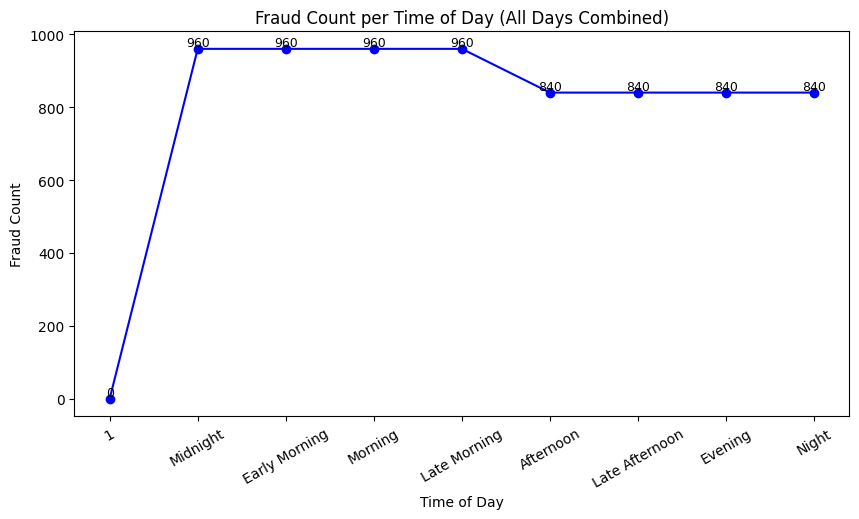

In [67]:
# Fraud count per time of day
fraud_per_tod = df.groupby("time_of_day")['fraud'].sum().reindex([1,
    "Midnight","Early Morning","Morning","Late Morning",
    "Afternoon","Late Afternoon","Evening","Night"   
]).fillna(0)


ax = fraud_per_tod.plot(kind="line", marker="o", figsize=(10,5), color="blue",
                        title="Fraud Count per Time of Day (All Days Combined)")
plt.xlabel("Time of Day")
plt.ylabel("Fraud Count")
plt.xticks(rotation=30)

for x, y in zip(range(len(fraud_per_tod)), fraud_per_tod.values):
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9)
plt.savefig("TOD_distribution.png", dpi=300)

plt.show()


### Amount Distribution by Day
Line Chart

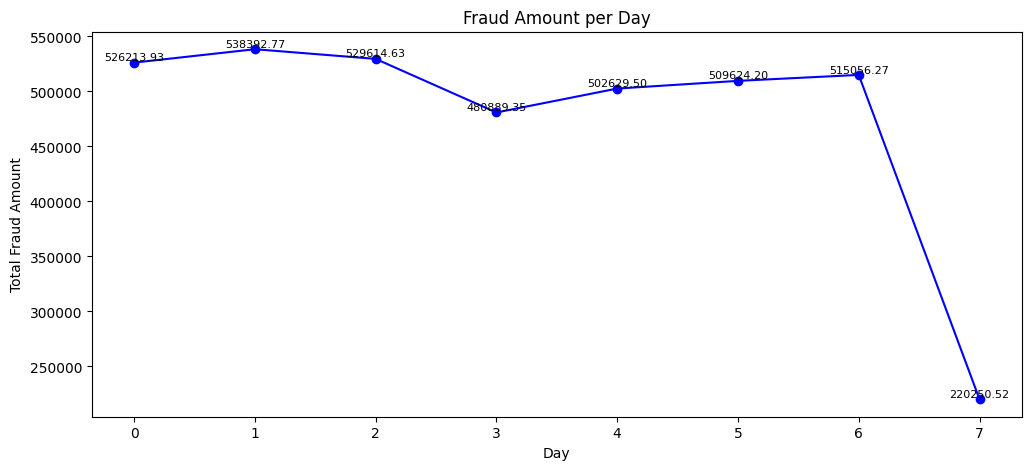

In [68]:
# Fraud amount per day (sum of amounts where fraud == 1)
fraud_amount_per_day = df[df['fraud'] == 1].groupby("day")['amount'].sum()

ax = fraud_amount_per_day.plot(kind="line", marker="o", figsize=(12,5), color="blue",
                               title="Fraud Amount per Day")
plt.xlabel("Day")
plt.ylabel("Total Fraud Amount")

for x, y in fraud_amount_per_day.items():
    ax.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontsize=8)

plt.show()


### Category Amount Distribution by Day
Bar Chart

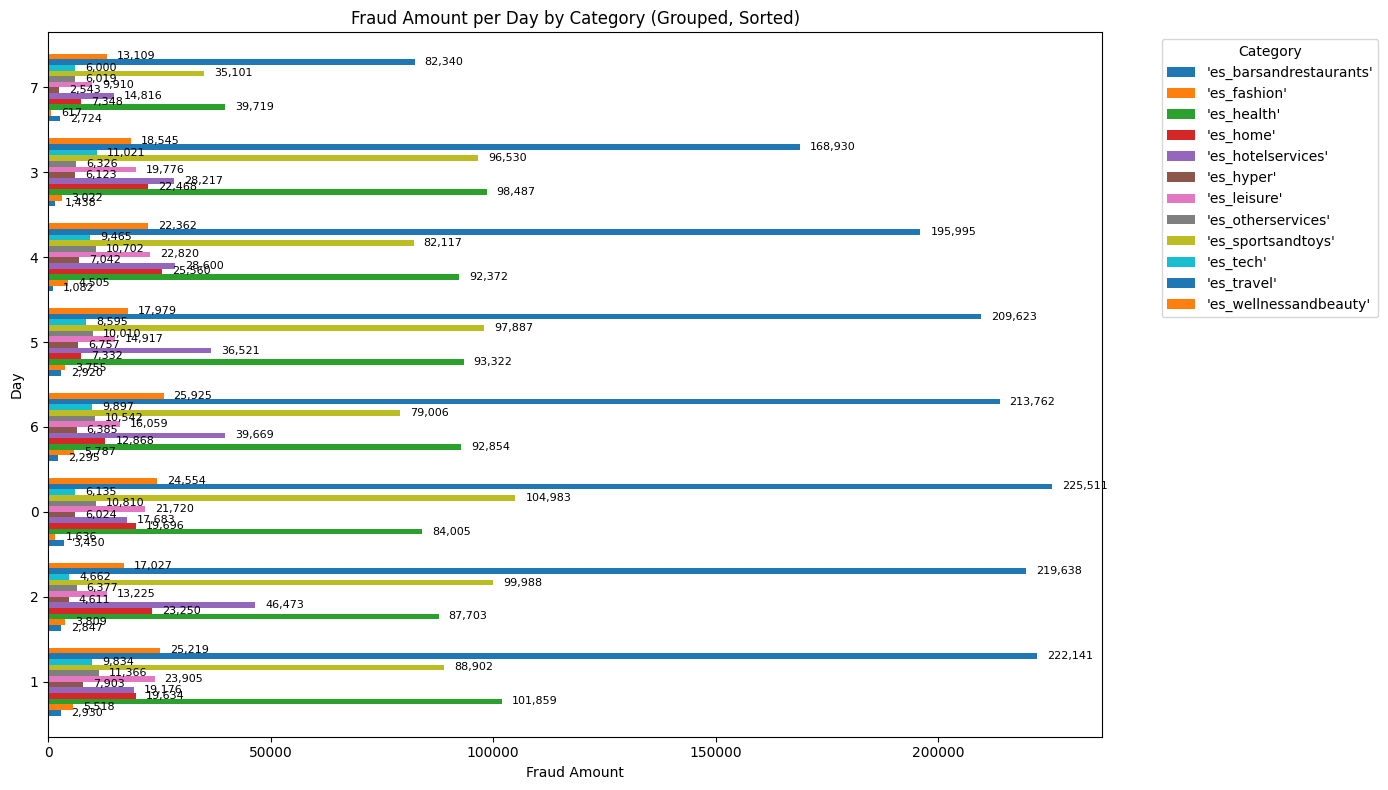

In [69]:
# Fraud amount per day per category
fraud_amount_cat_day = (
    df[df['fraud'] == 1]
    .groupby(["day", "category"])['amount']
    .sum()
    .unstack(fill_value=0)
)

# Sorting days by total amount
fraud_amount_cat_day = fraud_amount_cat_day.loc[
    fraud_amount_cat_day.sum(axis=1).sort_values(ascending=False).index
]

# horizontal plot
ax = fraud_amount_cat_day.plot(kind="barh", stacked=False, figsize=(14,8), width=0.8)

plt.title("Fraud Amount per Day by Category (Grouped, Sorted)")
plt.xlabel("Fraud Amount")
plt.ylabel("Day")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:  
        ax.text(width + (0.01 * fraud_amount_cat_day.values.max()),  
                p.get_y() + p.get_height() / 2,
                f"{int(width):,}",  
                ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


### Category Count Distribution by Day
Bar Chart

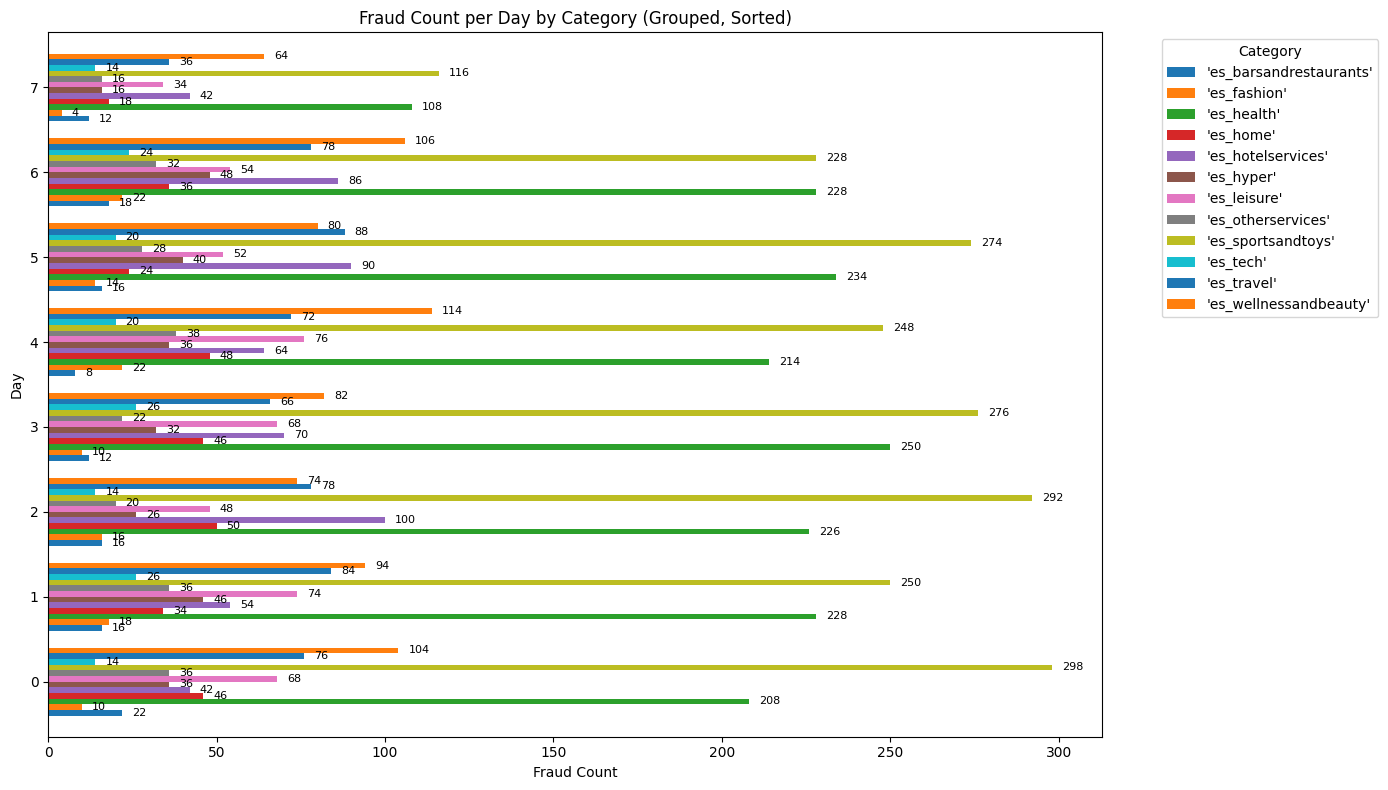

In [70]:
# Fraud count per day per category 
fraud_count_cat_day = (
    df[df['fraud'] == 1]
    .groupby(["day", "category"])['fraud']
    .count()
    .unstack(fill_value=0)
)

# Sorting days by total count 
fraud_count_cat_day = fraud_count_cat_day.loc[
    fraud_count_cat_day.sum(axis=1).sort_values(ascending=False).index
]

#  horizontal Plot
ax = fraud_count_cat_day.plot(kind="barh", stacked=False, figsize=(14,8), width=0.8)

plt.title("Fraud Count per Day by Category (Grouped, Sorted)")
plt.xlabel("Fraud Count")
plt.ylabel("Day")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')


for p in ax.patches:
    width = p.get_width()
    if width > 0:  
        ax.text(width + (0.01 * fraud_count_cat_day.values.max()),  # small offset
                p.get_y() + p.get_height() / 2,
                f"{int(width)}", 
                ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()


### Extacting Enterprise Column from Gender
New 2 Columns =
New Gender & Enterprise

In [71]:
gender_counts = df['gender'].value_counts()

print("ender Counts:")
print(gender_counts)

ender Counts:
gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64


In [72]:
# Cleaning gender column from quotes
gender_clean = df['gender'].astype(str).str.strip().str.replace("'", "", regex=False)

# Createing gender and replacing E with U
df['gender_new'] = gender_clean.replace({'E': 'U'})

# Enterprise flag from original cleaned gender
df['Enterprise'] = (gender_clean == 'E').astype(int)


print("Unique values in gender_clean:", gender_clean.unique())
print("Unique values in gender_new:", df['gender_new'].unique())
print("Enterprise counts:\n", df['Enterprise'].value_counts())


Unique values in gender_clean: ['M' 'F' 'E' 'U']
Unique values in gender_new: ['M' 'F' 'U']
Enterprise counts:
 Enterprise
0    593465
1      1178
Name: count, dtype: int64


In [73]:
df['gender_new'].value_counts()

gender_new
F    324565
M    268385
U      1693
Name: count, dtype: int64

In [74]:
df.head(3)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,day,hour,time_of_day,gender_new,Enterprise
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,0,0,Midnight,M,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,0,0,Midnight,M,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,0,0,Midnight,F,0


In [75]:
# Saving results
df.to_csv("fraud_eda.csv", index=False)